<a href="https://colab.research.google.com/github/insyspo/ordovician/blob/main/Ordovician_studies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparation

In [2]:
!pip install igraph
!pip install leidenalg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 10.0 MB/s eta 0:00:00


In [3]:
from igraph import Graph
import igraph as ig
import pandas as pd
import leidenalg as la
import numpy as np
import pandas_gbq
import glob
import matplotlib.pyplot as plt

In [1]:
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

Authenticated


# Collect works

## Original set of works - Ordovician keywords

In [ ]:
%%bigquery --project insyspo

DROP TABLE IF EXISTS insyspo.userdb_carolina_zabini.works_ordovician;
CREATE TABLE insyspo.userdb_carolina_zabini.works_ordovician AS (
  SELECT DISTINCT id
  FROM (
    SELECT id
    FROM insyspo.publicdb_openalex_2024_02_rm.works
    WHERE LOWER(display_name) LIKE '%ordovician%'
      OR LOWER(display_name) LIKE '%silurian%'
      OR LOWER(display_name) LIKE '%early paleozoic%'
      OR LOWER(display_name) LIKE '%early palaeozoic%'
      OR LOWER(display_name) LIKE '%post cambrian%'
      OR LOWER(display_name) LIKE '%post-cambrian%'
      OR LOWER(display_name) LIKE '%postcambrian%'
      OR LOWER(display_name) LIKE '%pre silurian%'
      OR LOWER(display_name) LIKE '%pre-silurian%'
      OR LOWER(display_name) LIKE '%presilurian%'
      OR LOWER(display_name) LIKE '%basal palaeo%'
      OR LOWER(display_name) LIKE '%basal paleozoic%'
      OR LOWER(display_name) LIKE '%early phanerozoic%'
      OR LOWER(display_name) LIKE '%hirnantian%'
      OR LOWER(display_name) LIKE '%katian%'
      OR LOWER(display_name) LIKE '%sandbian%'
      OR LOWER(display_name) LIKE '%darriwillian%'
      OR LOWER(display_name) LIKE '%dapingian%'
      OR LOWER(display_name) LIKE '%floian%'
      OR LOWER(display_name) LIKE '%tremadocian%'
    UNION ALL
    SELECT id
    FROM insyspo.projectdb_cwts_summer_school_2023.works_abstracts
    WHERE LOWER(abstract) LIKE '%ordovician%'
      OR LOWER(abstract) LIKE '%silurian%'
      OR LOWER(abstract) LIKE '%early paleozoic%'
      OR LOWER(abstract) LIKE '%early palaeozoic%'
      OR LOWER(abstract) LIKE '%post cambrian%'
      OR LOWER(abstract) LIKE '%post-cambrian%'
      OR LOWER(abstract) LIKE '%postcambrian%'
      OR LOWER(abstract) LIKE '%pre silurian%'
      OR LOWER(abstract) LIKE '%pre-silurian%'
      OR LOWER(abstract) LIKE '%presilurian%'
      OR LOWER(abstract) LIKE '%basal palaeo%'
      OR LOWER(abstract) LIKE '%basal paleozoic%'
      OR LOWER(abstract) LIKE '%early phanerozoic%'
      OR LOWER(abstract) LIKE '%hirnantian%'
      OR LOWER(abstract) LIKE '%katian%'
      OR LOWER(abstract) LIKE '%sandbian%'
      OR LOWER(abstract) LIKE '%darriwillian%'
      OR LOWER(abstract) LIKE '%dapingian%'
      OR LOWER(abstract) LIKE '%floian%'
      OR LOWER(abstract) LIKE '%tremadocian%'
  )
)

# Collect citations

In [ ]:
%%bigquery --project insyspo

DROP TABLE IF EXISTS insyspo.userdb_carolina_zabini.ordovician_cited;
CREATE TABLE insyspo.userdb_carolina_zabini.ordovician_cited AS (
  SELECT  b.work_id, b.referenced_work_id
  FROM `insyspo.userdb_carolina_zabini.works_ordovician` AS a
  JOIN `insyspo.publicdb_openalex_2024_02_rm.works_referenced_works` AS b
  ON a.id = b.referenced_work_id
);

DROP TABLE IF EXISTS insyspo.userdb_carolina_zabini.ordovician_citing;
CREATE TABLE insyspo.userdb_carolina_zabini.ordovician_citing AS (
  SELECT  b.work_id, b.referenced_work_id
  FROM `insyspo.userdb_carolina_zabini.works_ordovician` AS a
  JOIN `insyspo.publicdb_openalex_2024_02_rm.works_referenced_works` AS b
  ON a.id = b.work_id
);


Query is running:   0%|          |

""


## Works that cited original set that are also in the original set

In [ ]:
%%bigquery --project insyspo

SELECT a.work_id, COUNT(*) AS n
FROM insyspo.userdb_carolina_zabini.ordovician_cited AS a
JOIN insyspo.userdb_carolina_zabini.works_ordovician AS b
ON a.work_id = b.id
GROUP BY a.work_id

Query is running:   0%|          |

Downloading:   0%|          |

,work_id,n
0,https://openalex.org/W3164701358,16
1,https://openalex.org/W2138388300,11
2,https://openalex.org/W2238727761,56
3,https://openalex.org/W2164239504,17
4,https://openalex.org/W2117802002,19
...,...,...
10185,https://openalex.org/W2072537746,1
10186,https://openalex.org/W1966796485,2
10187,https://openalex.org/W2042095030,1
10188,https://openalex.org/W4385666742,1


## Works cited by original set that are also in the original set

In [ ]:
%%bigquery --project insyspo

SELECT a.referenced_work_id, COUNT(*) AS n
FROM insyspo.userdb_carolina_zabini.ordovician_citing AS a
JOIN insyspo.userdb_carolina_zabini.works_ordovician AS b
ON a.referenced_work_id = b.id
GROUP BY a.referenced_work_id

Query is running:   0%|          |

Downloading:   0%|          |

,referenced_work_id,n
0,https://openalex.org/W1977488297,38
1,https://openalex.org/W1966287368,32
2,https://openalex.org/W2222694865,66
3,https://openalex.org/W2082575073,60
4,https://openalex.org/W2099144811,55
...,...,...
12377,https://openalex.org/W2250269570,24
12378,https://openalex.org/W2500302673,24
12379,https://openalex.org/W2280358265,24
12380,https://openalex.org/W2766302858,24


## Complete set of connections

In [ ]:
%%bigquery --project insyspo

DROP TABLE IF EXISTS insyspo.userdb_carolina_zabini.ordovician_citations;
CREATE TABLE insyspo.userdb_carolina_zabini.ordovician_citations AS (
  SELECT  *
  FROM `insyspo.userdb_carolina_zabini.ordovician_cited`
  UNION ALL
  SELECT  *
  FROM `insyspo.userdb_carolina_zabini.ordovician_citing`
);


# Clustering

In [22]:
!pip install python-igraph
!pip install leidenalg

In [23]:
%%bigquery df --project=insyspo

SELECT *
FROM insyspo.userdb_carolina_zabini.ordovician_citations

Query is running:   0%|          |

Downloading:   0%|          |

## Clustering with Leiden algorithm

In [24]:
tuples = [tuple(x) for x in df.values]
G = ig.Graph.TupleList(tuples, directed = True)

In [28]:
#partition = la.find_partition(G, la.CPMVertexPartition, resolution_parameter = 1e-4)
partition = la.find_partition(G, la.ModularityVertexPartition)

In [ ]:
partition.summary()

'Clustering with 155445 elements and 436 clusters'

In [ ]:
partition.sizes()

(array([310.,  22.,  33.,  15.,   9.,   4.,   5.,   7.,   2.,   2.,   2.,
          1.,   0.,   1.,   1.,   7.,   0.,   7.,   5.,   3.]),
 array([0.69314718, 1.15004104, 1.6069349 , 2.06382876, 2.52072262,
        2.97761648, 3.43451034, 3.8914042 , 4.34829806, 4.80519192,
        5.26208578, 5.71897964, 6.1758735 , 6.63276736, 7.08966122,
        7.54655508, 8.00344894, 8.4603428 , 8.91723666, 9.37413052,
        9.83102438]),
 <BarContainer object of 20 artists>)

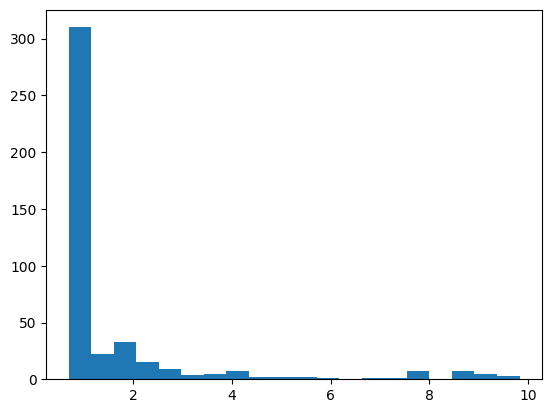

In [ ]:
plt.hist(np.log(partition.sizes()),bins=20)


In [6]:
%%bigquery df --project=insyspo

  SELECT cluster, COUNT(*) AS size
  FROM insyspo.userdb_carolina_zabini.ordovician_clusters
  GROUP BY cluster
  HAVING size > 150

Query is running:   0%|          |

Downloading:   0%|          |

<Axes: xlabel='cluster'>

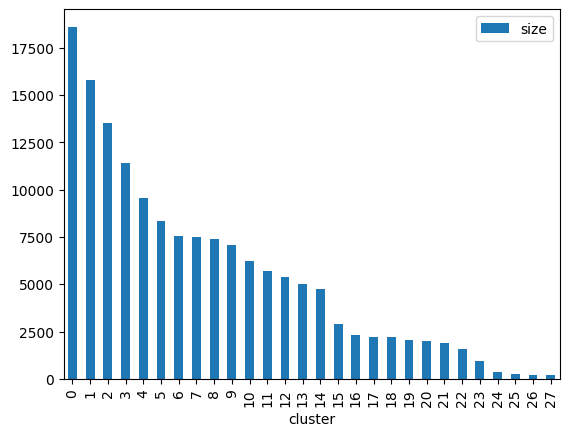

In [7]:
df.plot.bar(x='cluster',y='size')

## Save clustering to table

In [29]:
clusters_table = pd.DataFrame({'work': G.vs['name'],'cluster': partition.membership, 'centrality': G.eigenvector_centrality()})

In [30]:
clusters_table.to_gbq('userdb_carolina_zabini.ordovician_clusters', project_id='insyspo', if_exists='replace')

100%|██████████| 1/1 [00:00<00:00, 6078.70it/s]


In [ ]:
%%bigquery --project=insyspo

DROP TABLE IF EXISTS insyspo.userdb_carolina_zabini.ordovician_cluster_sizes;
CREATE TABLE insyspo.userdb_carolina_zabini.ordovician_cluster_sizes AS (
  SELECT cluster,
    COUNT(DISTINCT a.work) AS n_works,
    SUM(c.cited_by_count) AS citations,
    AVG(c.publication_year) AS avg_year,
    AVG(cited_by_count) AS avg_citations
  FROM insyspo.userdb_carolina_zabini.ordovician_clusters AS a
  JOIN `insyspo.publicdb_openalex_2024_02_rm.works` AS c
  ON a.work = c.id
  GROUP BY cluster
)

Query is running:   0%|          |

""


## Collection information about clusters

In [8]:
%%bigquery df --project=insyspo

WITH largest AS (
  SELECT cluster, COUNT(*) AS size
  FROM insyspo.userdb_carolina_zabini.ordovician_clusters
  GROUP BY cluster
  HAVING size > 150
)
SELECT a.cluster AS cluster,
  AVG(c.publication_year) AS avg_year,
  MIN(c.publication_year) AS min_year,
  MAX(c.publication_year) AS max_year,
  COUNT(*) AS works,
  STRING_AGG(c.display_name) AS titles,
FROM insyspo.userdb_carolina_zabini.ordovician_clusters AS a
JOIN `insyspo.publicdb_openalex_2024_02_rm.works` AS c
ON a.work = c.id
JOIN largest AS d
ON d.cluster = a.cluster
WHERE c.cited_by_count>=100
GROUP BY a.cluster
ORDER BY a.cluster


Query is running:   0%|          |

Downloading:   0%|          |

In [10]:
df.head()

,cluster,avg_year,min_year,max_year,works,titles
0,0,2002.259190,1939,2023,4298,Experimental Constraints on Himalayan Anatexis...
1,1,1988.446602,1893,2021,1957,Graphitization of carbonaceous matter during m...
2,2,2002.074101,1879,2022,2753,Development of the theory and technology for l...
3,3,1995.385119,1899,2021,1680,Aluminum-poor ferromanganoan sediments on acti...
4,4,1992.471257,1758,2021,1496,"An Annotated Linnaean Hierarchy, with Comments..."


## Age of clusters

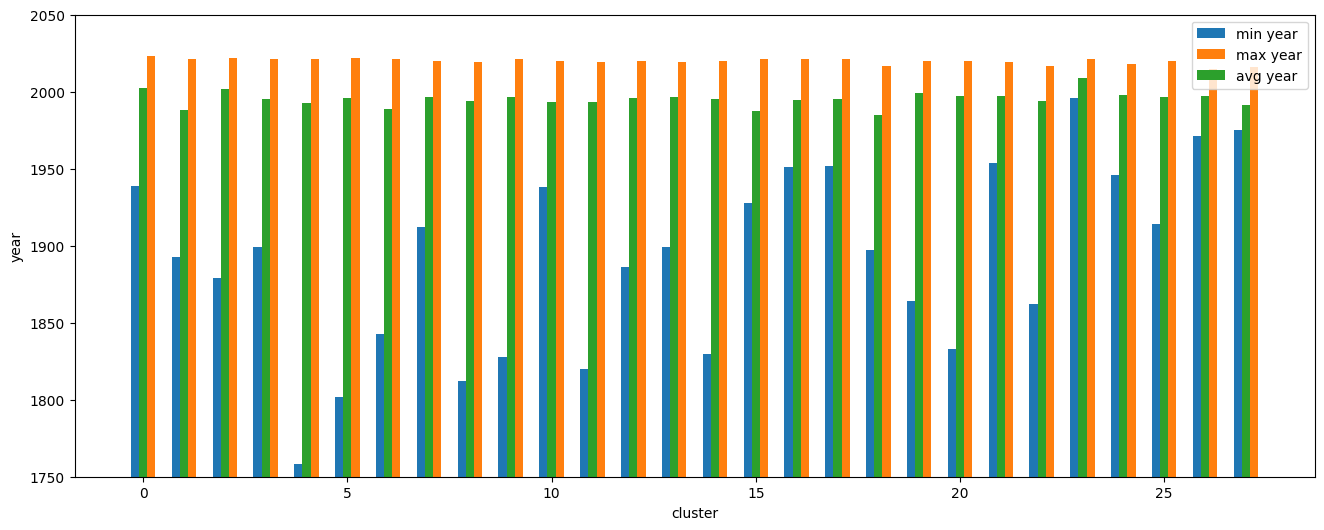

In [20]:
plt.figure(figsize=(16,6))
plt.bar(x=df['cluster']-0.2,height=df['min_year'],width=0.2,label='min year')
plt.bar(x=df['cluster']+0.2,height=df['max_year'],width=0.2,label='max year')
plt.bar(x=df['cluster'],height=df['avg_year'],width=0.2,label='avg year')
plt.ylim((1750,2050))
plt.xlabel('cluster')
plt.ylabel('year')
plt.legend()

# Most cited works in largest clusters

In [39]:
%%bigquery --project=insyspo

DROP TABLE IF EXISTS insyspo.userdb_carolina_zabini.ordovician_most_relevant_each_cluster;
CREATE TABLE insyspo.userdb_carolina_zabini.ordovician_most_relevant_each_cluster AS (
  SELECT cluster,
    title,
    work,
    cited_by_count,
    centrality,
    cit_order,
    central_order
  FROM (
    SELECT a.cluster AS cluster,
      c.display_name AS title,
      c.cited_by_count,
      a.work,
      a.centrality,
      ROW_NUMBER() OVER (PARTITION BY a.cluster ORDER BY c.cited_by_count DESC)
        AS cit_order,
      ROW_NUMBER() OVER (PARTITION BY a.cluster ORDER BY a.centrality DESC)
        AS central_order,
    FROM insyspo.userdb_carolina_zabini.ordovician_clusters AS a
    JOIN `insyspo.publicdb_openalex_2024_02_rm.works` AS c
    ON a.work = c.id
    ORDER BY cluster, c.cited_by_count DESC, a.centrality DESC
  )
  WHERE cit_order < 200 AND cluster < 28 AND central_order < 200
)

Query is running:   0%|          |

""


In [4]:
%%bigquery df --project=insyspo

SELECT a.cluster,
  STRING_AGG(a.title,'. ') AS titles,
  SUM(a.cited_by_count) AS relevant_citations,
  AVG(a.cited_by_count) AS relevant_avg_citations,
  b.n_works,
  b.citations,
  b.avg_citations
FROM  insyspo.userdb_carolina_zabini.ordovician_most_relevant_each_cluster AS a
JOIN insyspo.userdb_carolina_zabini.ordovician_cluster_sizes AS b
ON a.cluster = b.cluster
GROUP BY a.cluster, b.n_works, b.citations, b.avg_citations
ORDER BY a.cluster

Query is running:   0%|          |

Downloading:   0%|          |

# List of descriptions produced by LLM

They were produced using Llama-2 model using the titles collected for the instersection of the 100 works most cited and the 100 works most central.

In [5]:
themes = ['Geology and Petrology','Marine benthic diversity',
  'Mass extinctions and Earth ages','Plate Tectonics and Tectonic Evolution',
  'Isotope Geochemistry and Sedimentary Environments',
  'Chemical and Geological Analyses','Ontogeny and philogeny',
  'Geological Studies of Plate Tectonics and Paleontology',' Geochemistry and Petrology',
  'Cenozoic and Mesozoic Paleosols','Sedimentology and Depositional Processes',
  'Geological Processes and Tectonic Settings of Marginal Basins and Rift Systems',
  'Geological Processes and Tectonic Evolution of Continents',
  'Geological Processes and Tectonic Evolution of Mountain Belts',
  'Paleomagnetism and Plate Tectonics',
  'Diagenesis and Mineralogical Alterations in Sedimentary Environments',
  'Astrogeology and Impact Events',
  'Tectonic Subsidence and Basin Formation',
  'Geochemistry of Geological Samples and Environmental Systems',
  'Vertebrate Evolution and Paleontology','Geological and Geotectonic Studies',
  'Hydrogeology and Groundwater Analysis',
  'Fungal Symbiosis and Diversity','Biogeochemistry and Microbial Ecology',
  'Deep-Sea Sediment Dynamics and Depositional Processes',
  'Geochemistry and mineral composition','Climate change and planetary processes',
  'Geochemical analysis and environmental impact']

In [6]:
df['themes'] = themes

# Production of clusters

In [51]:
%%bigquery  --project=insyspo

DROP TABLE IF EXISTS insyspo.userdb_carolina_zabini.ordovician_yearly_output;
CREATE TABLE insyspo.userdb_carolina_zabini.ordovician_yearly_output AS (
  SELECT c.publication_year, COUNT(a.work) AS works
  FROM insyspo.userdb_carolina_zabini.ordovician_clusters AS a
  JOIN `insyspo.publicdb_openalex_2024_02_rm.works` AS c
  ON a.work = c.id
  GROUP BY c.publication_year
  ORDER BY c.publication_year
)

Query is running:   0%|          |

""


In [ ]:
%%bigquery  --project=insyspo

DROP TABLE IF EXISTS insyspo.userdb_carolina_zabini.ordovician_clusters_yearly;
CREATE TABLE insyspo.userdb_carolina_zabini.ordovician_clusters_yearly AS (
  WITH largest AS (
    SELECT cluster, COUNT(*) AS size
    FROM insyspo.userdb_carolina_zabini.ordovician_clusters
    GROUP BY cluster
    HAVING size > 5000
  )
  SELECT c.publication_year,
    a.cluster,
    COUNT(a.work) AS works
  FROM insyspo.userdb_carolina_zabini.ordovician_clusters AS a
  JOIN `insyspo.publicdb_openalex_2024_02_rm.works` AS c
  ON a.work = c.id
  JOIN largest AS d
  ON d.cluster = a.cluster
  WHERE publication_year > 1960 AND publication_year < 2020
  GROUP BY a.cluster, c.publication_year
  ORDER BY c.publication_year, a.cluster
)

Query is running:   0%|          |

""


In [52]:
%%bigquery df --project=insyspo

SELECT *
FROM insyspo.userdb_carolina_zabini.ordovician_clusters_yearly


Query is running:   0%|          |

Downloading:   0%|          |

In [53]:
table = pd.pivot_table(df, values='works', index=['publication_year'],
                       columns=['cluster'], aggfunc="sum",fill_value=0)

<Axes: xlabel='publication_year'>

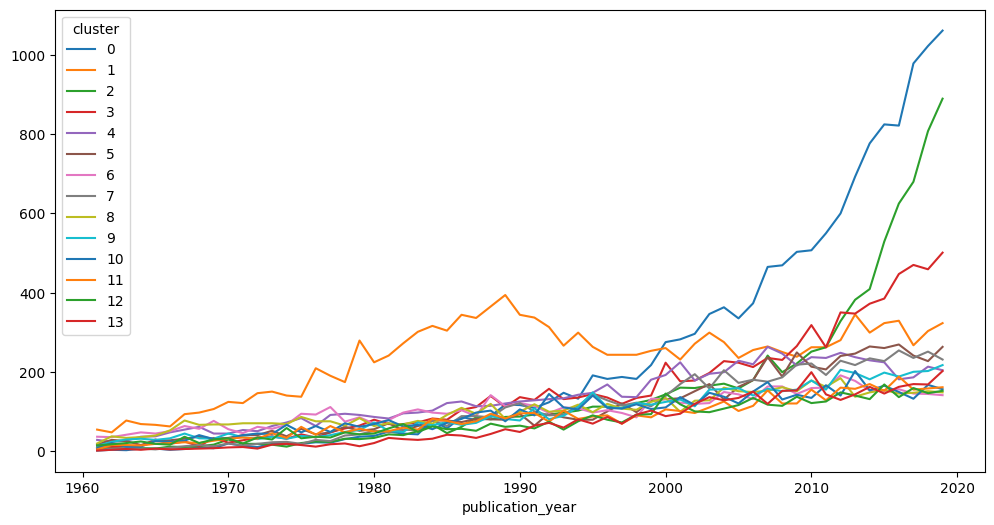

In [54]:
table.plot.line(figsize=(12,6))

In [55]:
%%bigquery df --project=insyspo

SELECT a.publication_year, a.cluster, a.works/b.works AS production
FROM insyspo.userdb_carolina_zabini.ordovician_clusters_yearly AS a
JOIN insyspo.userdb_carolina_zabini.ordovician_yearly_output AS b
ON a.publication_year = b.publication_year
WHERE cluster < 6

Query is running:   0%|          |

Downloading:   0%|          |

In [56]:
table = pd.pivot_table(df, values='production', index=['publication_year'],
                       columns=['cluster'], aggfunc="sum",fill_value=0)

<Axes: xlabel='publication_year'>

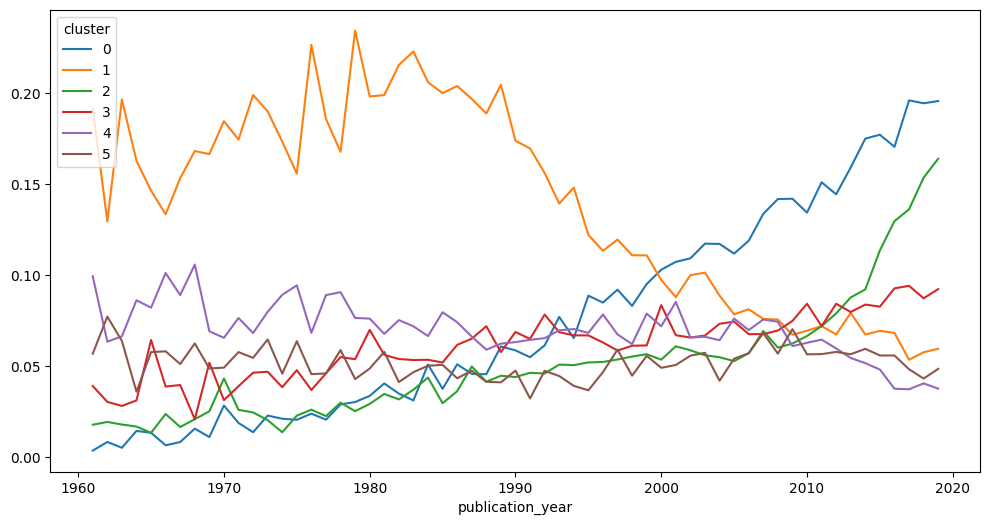

In [57]:

table.plot.line(figsize=(12,6))

# Network of clusters

In [ ]:
%%bigquery df --project=insyspo

SELECT b.cluster AS cluster1,
  c.cluster AS cluster2,
  COUNT(*) AS n
FROM insyspo.userdb_carolina_zabini.ordovician_citations AS a
JOIN insyspo.userdb_carolina_zabini.ordovician_clusters AS b
ON a.work_id = b.work
JOIN insyspo.userdb_carolina_zabini.ordovician_clusters AS c
ON a.referenced_work_id = c.work
GROUP BY b.cluster, c.cluster
ORDER BY n DESC


Query is running:   0%|          |

Downloading:   0%|          |

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
folder = '/content/drive/My Drive/Colaboração/Paleontology scientometrics/'

Mounted at /content/drive/


In [ ]:
df.head()

,cluster1,cluster2,n
0,0,0,75656
1,2,2,50463
2,1,1,46537
3,9,9,39381
4,4,4,37058


In [ ]:
df.to_csv(folder+'network_clusters.csv',header=None,index=False)

## Labels for clusters

### Most frequent institution

In [ ]:
%%bigquery --project=insyspo

DROP TABLE IF EXISTS insyspo.userdb_carolina_zabini.ordovician_clusters_institutions;
CREATE TABLE insyspo.userdb_carolina_zabini.ordovician_clusters_institutions AS (
  SELECT a.cluster, b.institution_id,
    COUNT(DISTINCT(a.work)) AS n
  FROM insyspo.userdb_carolina_zabini.ordovician_clusters AS a
  JOIN insyspo.publicdb_openalex_2024_02_rm.works_authorships AS b
  ON a.work = b.work_id
  GROUP BY a.cluster, b.institution_id
  ORDER BY a.cluster, n DESC
);

DROP TABLE IF EXISTS insyspo.userdb_carolina_zabini.ordovician_clusters_institution_m;
CREATE TABLE insyspo.userdb_carolina_zabini.ordovician_clusters_institution_m AS (
  WITH common_insts AS (
    SELECT cluster, MAX(n) AS nmax
    FROM insyspo.userdb_carolina_zabini.ordovician_clusters_institutions
    GROUP BY cluster
    ORDER BY nmax DESC
  )
  SELECT a.cluster, a.institution_id, b.nmax AS works_inst
  FROM insyspo.userdb_carolina_zabini.ordovician_clusters_institutions AS a
  JOIN common_insts AS b
  ON a.cluster = b.cluster AND a.n = b.nmax
)


Query is running:   0%|          |

""


In [ ]:
%%bigquery df --project=insyspo

SELECT a.cluster,
  ANY_VALUE(b.display_name) AS institution,
  ANY_VALUE(b.country_code) AS country,
  ANY_VALUE(a.works_inst) AS works_largest_inst
FROM insyspo.userdb_carolina_zabini.ordovician_clusters_institution_m AS a
JOIN insyspo.publicdb_openalex_2024_02_rm.institutions AS b
ON a.institution_id = b.id
GROUP BY a.cluster

Query is running:   0%|          |

Downloading:   0%|          |

In [ ]:
df.columns = ['id','description','label','score<works_inst>','weight<works_inst>']
df.to_csv(folder+'clusters_labels.csv',index=False)

### Most frequent venue

In [ ]:
%%bigquery --project=insyspo

DROP TABLE IF EXISTS insyspo.userdb_carolina_zabini.ordovician_clusters_institutions;
CREATE TABLE insyspo.userdb_carolina_zabini.ordovician_clusters_institutions AS (
  SELECT a.cluster, b.institution_id,
    COUNT(DISTINCT(a.work)) AS n
  FROM insyspo.userdb_carolina_zabini.ordovician_clusters AS a
  JOIN insyspo.publicdb_openalex_2024_02_rm.works_authorships AS b
  ON a.work = b.work_id
  GROUP BY a.cluster, b.institution_id
  ORDER BY a.cluster, n DESC
);

DROP TABLE IF EXISTS insyspo.userdb_carolina_zabini.ordovician_clusters_institution_m;
CREATE TABLE insyspo.userdb_carolina_zabini.ordovician_clusters_institution_m AS (
  WITH common_insts AS (
    SELECT cluster, MAX(n) AS nmax
    FROM insyspo.userdb_carolina_zabini.ordovician_clusters_institutions
    GROUP BY cluster
    ORDER BY nmax DESC
  )
  SELECT a.cluster, a.institution_id
  FROM insyspo.userdb_carolina_zabini.ordovician_clusters_institutions AS a
  JOIN common_insts AS b
  ON a.cluster = b.cluster AND a.n = b.nmax
)